## Earthquake Statistics: When and How Many

Hundreds of earthquakes happen everyday, all over the Earth. The majority of these events are not felt by people and rarely cause any damage. But, the shaking of the ground doesn't go unnoticed. Earthquakes large and small are detected by number of instruments, including global and local arrays of seismographs recording in locations ranging from the tops of mountains to the bottom of the ocean.

Understanding when and where earthquakes occur is important for identifying locations where there is an increased risk from damaging earthquakes. Toward that effort, there have been various attempts to predict earthquakes, with limited sucess. We know that there are certain regions where damaging eartquakes occur more frequently, namely plate boundaries and especially convergent margins. While we might have a good idea of "where", it's a lot more complicated to determine "when".

Even if there aren't any obvious patterns when looking at the global occurrence of larger earthquakes, it is still interesting to explore the general statistics -- how many events occur each day, what are the year-to-year variations, are there any anomalous months or days, etc. We won't know what's in the data until we look. Fortunately, there is an abundance of earthquake data available from a variety of sources.

### Earthquake data

With global coverage using relatively sensitive instruments, it is possible to detect all events greater than about a magnitude 6 worldwide (more on [earthquake magnitude scales](https://earthquake.usgs.gov/learn/topics/measure.php)). Smaller events can be recorded by local networks and stations close to the event, but there are many small earthquakes that are too remote to be detected. For this analysis, I selected a lower magnitude limit of magnitude 6 so that my data set would have a complete record of all earthquakes at M6 and above.

The vast majority of the bigger earthquakes are now detected by the [The Global Seismographic Network (GSN)](https://www.iris.edu/hq/programs/gsn) which was formed in 1986. Prior to that, there were stations recording for many years as part of different networks or individually. I somewhat arbitrarily chose to begin with 1970 since nuclear testing at the time would have necessitated monitoring for the seismic signals generated by the tests.

Using data from 1970 to the end of 2017, let's take a look at all of the earthquakes greater than M6. The data is from the [USGS earthquake catalog](https://earthquake.usgs.gov/earthquakes/search/) with search parameters of M6 and greater worldwide, for the years 1970 to 2017.

In [1]:
# Load in the csv file of earthquakes M6 and greater 
# from 1 January, 1970 (source: USGS)

import pandas as pd
import numpy as np

df = pd.read_csv('/home/nicole/seismology/stats/eq_1970_M6.csv')
df.head(5)

,time,latitude,longitude,depth,mag,magType,place
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,"1km E of Kampungbaru, Indonesia"
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,"80km WNW of Bouvet Island, Bouvet Island"
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,"63km NNE of Kerman, Iran"
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,"53km NNE of Kerman, Iran"
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,"50km NW of Fais, Micronesia"


Before importing, the file was edited to remove the extra columns that weren't needed for this particular analysis (e.g. network ID, errors in location and depth, number of stations). The event type can be specified to include only earthquakes, which then excludes nuclear explosions that were above M6 between 1970 and 2017.

The minimum magnitude for this dataset is M6 but what about the total number of events and the largest earthquakes?

### General statistics

In [2]:
# Total number of earthquakes
N_tot = df['mag'].count()
print('Total number of earthquakes:', N_tot)
print('Average number per week:', round(N_tot/(52*(2017-1970+1)),2) )

# Largest magnitude
print('Largest magnitude earthquakes:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total number of earthquakes: 6714
Average number per week: 2.69
Largest magnitude earthquakes:


,mag,time,place
1001,9.1,2011-03-11T05:46:24.120Z,"near the east coast of Honshu, Japan"
2069,9.1,2004-12-26T00:58:53.450Z,off the west coast of northern Sumatra
1192,8.8,2010-02-27T06:34:11.530Z,"offshore Bio-Bio, Chile"
797,8.6,2012-04-11T08:38:36.720Z,off the west coast of northern Sumatra
2002,8.6,2005-03-28T16:09:36.530Z,"northern Sumatra, Indonesia"


Since 1970, there has been an average of almost three earthquakes each week with a magnitude M6 and greater. The largest earthquakes have all been relatively recent, between 2004 and 2012. As expected, these events occur at subducting plate boundaries and the five largest events are on the [Ring of Fire](https://en.wikipedia.org/wiki/Ring_of_Fire).

Separating the earthquakes into various time intervals, we can see if there are any patterns or other interesting features when looking at when earthquakes happen.

### Earthquakes: year, month, and day

In [3]:
# Count the number of earthquakes over various time intervals

# Import the datetime module
from datetime import datetime

# Create a datetime object column from the 
#string time column using strptime
df['dt_time'] = df['time'].apply(lambda x: 
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Add additional columns for day-of-year, year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
# Cast the dtype as int (currently an object)
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Find the number of earthquakes for each day, year, month, and day of the month. 
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Find the average number of events per year, day of year, and month
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

### Plotting time!

In [4]:
# Import stuff for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

# Settings for all figures
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

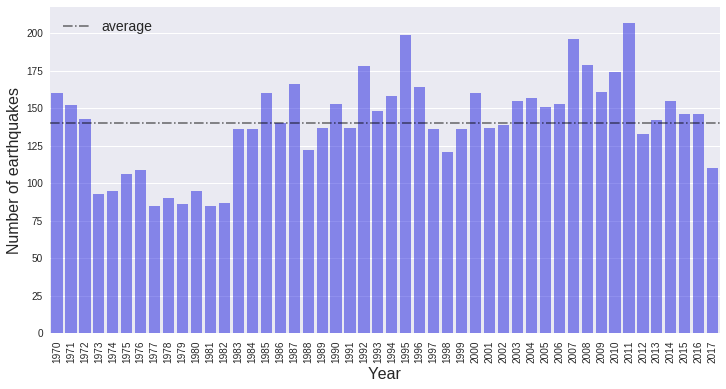

In [5]:
# Plot earthquake occurrence as a function of year
plt.figure(figsize=(12,6))

sns.barplot(year_tot.index, year_tot.values, alpha=0.5, color='blue')
plt.axhline(y=year_ave, color='k', linestyle='-.', 
            alpha=0.5, label='average')
plt.xlabel('Year'), plt.ylabel('Number of earthquakes')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

With the exception of the years 1973 through 1982, the number of earthquakes each year is pretty close to the average. I don't know why there are fewer events recorded for about 10 years, but it is probably associated with nuclear test monitoring and maybe funding problems that reduced the number of recording stations in the 70s; that is just a guess. On the other side, years with large earthquakes (e.g. 2011) will have a greater number of total events and will be above the average. To make the rest of the analysis more consistent, we'll just start with data beginning in 1983.

In [6]:
# Cut out years 1970 - 1982
df = df[df.year > 1982]

# Print the minimum year in the column
print("Earliest year of data:",min(df['year']))

Earliest year of data: 1983


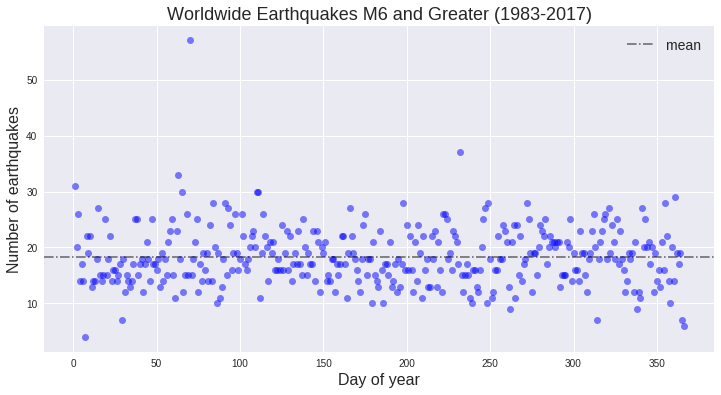

In [7]:
# Plot earthquake occurrence as a function of the day of the year
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'bo', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of earthquakes'), plt.xlabel('Day of year')
plt.title('Worldwide Earthquakes M6 and Greater (1983-2017)')
plt.legend()
plt.show()

With a few exceptions, the number of earthquakes on any given day of the year is consistent. The dates that stand out are probably when some of the largest events occurred, since the biggest earthquakes are almost always followed by numerous aftershocks, many of which would be larger than M6. To find those events, we'll look at the day of the year with the greatest number of events.

In [8]:
# Find the day of year with the greatest number of events
dofy_max = dofy_tot.sort_values(ascending=False).head(1).index[0]

# Print out the events that occur on those days of the year, 
# sorted by decreasing magnitude
df_max = df[df.dofy == dofy_max].sort_values('mag', ascending=False).head()
df_max[['place','dt_time','dofy','year','mag']]

,place,dt_time,dofy,year,mag
1001,"near the east coast of Honshu, Japan",2011-03-11 05:46:24.120,70,2011,9.1
990,"near the east coast of Honshu, Japan",2011-03-11 06:15:40.280,70,2011,7.9
985,"off the east coast of Honshu, Japan",2011-03-11 06:25:50.300,70,2011,7.7
1166,"Libertador General Bernardo O'Higgins, Chile",2010-03-11 14:55:27.510,70,2010,7.0
3176,Philippine Islands region,1997-03-11 19:22:00.130,70,1997,6.9


The [Tohoku-oki megathrust earthquake](https://earthquake.usgs.gov/earthquakes/eventpage/official20110311054624120_30#executive) occurred on March 11, 2011. With a magnitude of 9.1, there were hundreds of aftershocks with many of them above a magnitude 6.

What about the number of earthquakes for a given month? Grouping the events by month, maybe we can demonstrate that there isn't an "earthquake month" or a particular season in which earthquakes occur. 

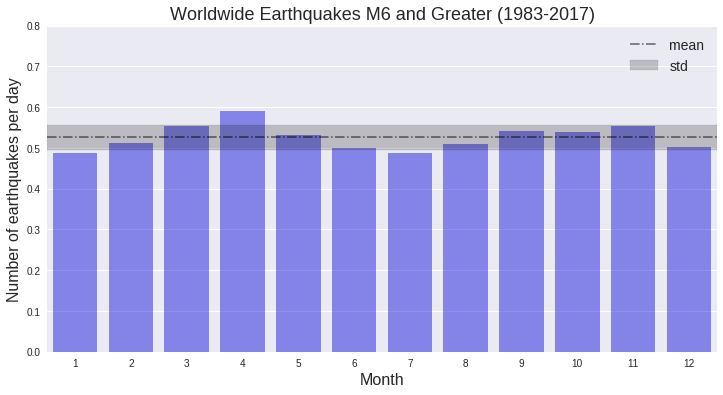

In [9]:
# Plot earthquake occurrence as a function of the month 
# (normalizing by the number of days in the month)

# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(month_sort.index, month_norm, alpha=0.5, color='blue')
ax.set_ylim([0, 0.8])
plt.axhline(y=np.mean(month_norm), color='k', linestyle='-.', 
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm), 
            np.mean(month_norm)+np.std(month_norm), 
            color='k', alpha=0.2, label='std')
plt.ylabel('Number of earthquakes per day'), plt.xlabel('Month')
plt.title('Worldwide Earthquakes M6 and Greater (1983-2017)')
plt.legend()
plt.show()

Well, there is maybe a little bit of a trend here, with a "peak" in April and "troughs" in January and July. It would be helpful to look at the number of events each month for individual years; a heatmap will be a great way to visualize this. Time to group some data!

### Grouping events for each year

In [10]:
# Group the DataFrame: earthquake counts for each year (rows) by month (columns) 

# Group the entire dataframe by year and month, 
# find the number of earthquakes in each year and month,
# then unstack to remove the hierarchical indexing
# (pivot the 'month' level to return a DataFrame with new columns).
df_newcol = df.groupby(['year','month'])['day'].size().unstack()

# Divide each row by the month length array to return
# the number of earthquakes per day for each month 
df_newcol = df_newcol / month_length 
df_newcol.round(2).tail(5)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,0.23,0.82,0.16,0.53,0.42,0.27,0.35,0.35,0.53,0.52,0.40,0.13
2014,0.19,0.29,0.55,0.87,0.58,0.53,0.55,0.29,0.27,0.26,0.40,0.32
2015,0.13,0.43,0.39,0.50,0.68,0.33,0.32,0.19,0.80,0.23,0.53,0.29
2016,0.42,0.36,0.16,0.73,0.23,0.50,0.23,0.42,0.43,0.26,0.43,0.65
2017,0.26,0.18,0.19,0.23,0.35,0.33,0.32,0.26,0.30,0.32,0.53,0.32


The grouped and unstacked data looks good. The number of earthquakes per day for each month is consistent with previous calculations; the average of each month column should equal the values plotted in the monthly bar graph above. Using the heatmap plot in the Seaborn package, let's see if there actually is an overall trend of more earthquakes in April and fewer in July.

### Heatmap for events by year and month

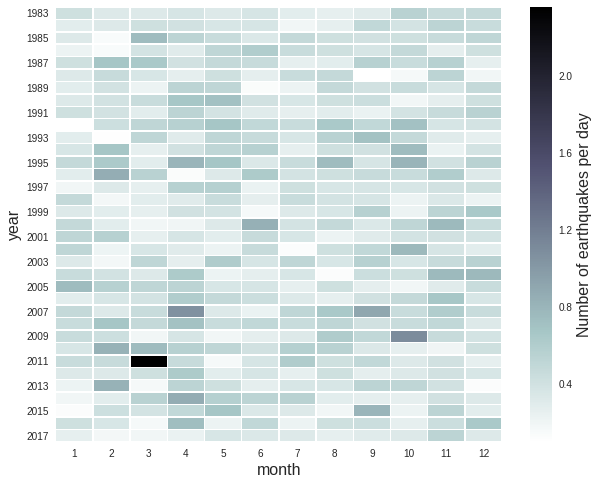

In [11]:
# Plot a heatmap of the unstacked DataFrame created above
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_newcol, linewidths=.5, cmap="bone_r", yticklabels=2,
                 cbar_kws={'label': 'Number of earthquakes per day'})
plt.yticks(rotation=0) 
plt.show()

### April showers bring...earthquakes?

It seems like there are actually more events in April and fewer in July. In April, especially from 2004 until 2016, there are more events than many of the other months, as shown by the line of darker shading. I don't quite know what is going on here so there is definitely more to be done to see where (on Earth) these events are happening and if there is any physical reason. We are also only looking at about 40 years of data here, so it may be that this pattern wouldn't be present with a larger sample size.

There is definitely more to do with this data set and other similar earthquake catalog data. Specifically, I would look at how the magnitudes of the earthquakes break down over individual years and months. It would also be helpful to look at where the earthquakes are occuring, especially by comparing the locations from month to month.

The data set used in this analysis is available [here](https://github.com/nwhoffman/earthquake_stats/blob/master/eq_1970_M6.csv) and the Jupyter notebook is [here](https://github.com/nwhoffman/earthquake_stats/eq_stats1.ipynb).